# Conversion du jeu de données GTFS en graphe networkx : itinéraires, centralités, connectivités

#### Pour commencer, on charge un objet *gtfs_feed*

In [1]:
from expreseau_gtfs.feed import gtfs_feed
import pandas 
import warnings; warnings.filterwarnings("ignore")

In [2]:
fic = r"C:\Users\Lucas\Documents\DONNEES\GTFS\t2c\gtfs-t2c_plus_scolaire.zip"
date = '20240305'
ph = [7,9]

Feed = gtfs_feed(gtfs_path=fic,
                date=date,
                plage_horaire=ph)

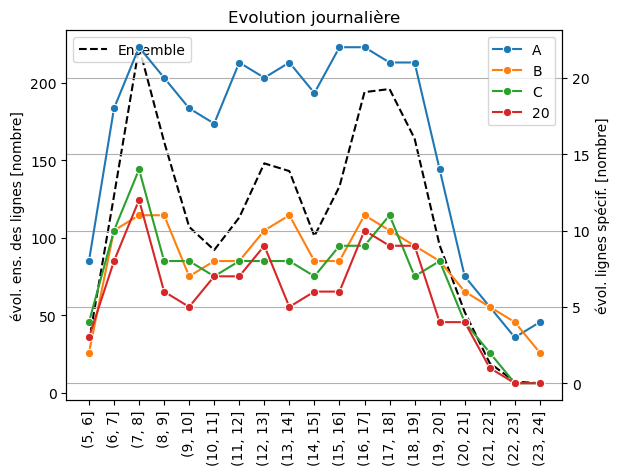

In [3]:
Feed.plot_evol_journaliere(liste_ligne_a_tracer=['A', 'B', 'C', "20"])

In [4]:
trips_minus = Feed.trips
routes_minus = Feed.routes

trips_minus = trips_minus.merge(routes_minus[['route_id', "route_short_name"]], on = "route_id")
# trips_minus
liste_lignes = ['41', '60', '62', '63', '65',
'66', '67', '68', '69', '70', '71', '73', '75', '76', '77', '78', '79',
'80', '82', '83', '42', '84', '85', '362', '61', "scolaire", "28"]

trips_minus = trips_minus[~trips_minus.route_short_name.isin(liste_lignes)]

Feed.trips = trips_minus[["trip_id","service_id","route_id","trip_headsign","direction_id","shape_id"]]

In [5]:
trips_minus.trip_id.values

array([4503749951498966, 4503749951498964, 4503749951498965, ...,
       4503749951534884, 4503749951534885, 4503749951534891], dtype=int64)

In [6]:
st = Feed.stop_times
st = st[st.trip_id.isin(trips_minus.trip_id.values)]
# Feed.stop_times 
st

,trip_id,stop_id,stop_sequence,arrival_time,departure_time,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
148,4503749951498966,3377704015496260,1,16:52:00,16:52:00,NaN,0,1,NaN
149,4503749951498966,3377704015496485,2,16:53:00,16:53:00,NaN,0,0,NaN
150,4503749951498966,3377704015496016,3,16:56:00,16:56:00,NaN,0,0,NaN
151,4503749951498966,3377704015495356,4,16:58:00,16:58:00,NaN,0,0,NaN
152,4503749951498966,3377704015495505,5,16:59:00,16:59:00,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...
198604,4503749951545245,3377704015495375,33,13:28:00,13:28:00,NaN,0,0,NaN
198605,4503749951545245,3377704015495916,34,13:29:00,13:29:00,NaN,0,0,NaN
198606,4503749951545245,3377704015495428,35,13:30:00,13:30:00,NaN,0,0,NaN
198607,4503749951545245,3377704015495368,36,13:31:00,13:31:00,NaN,0,0,NaN


### On charge ensuite un objet *graphes* à partir du Feed définit en amont

In [7]:
from expreseau_gtfs.graphes import graphes

In [8]:
graphe = graphes(Feed=Feed)


In [9]:
G = graphe.gtfs_to_nx(verbose = True, distance = 500, MALUS = 5) 

création du graphe directionnel
chargement des arrêts uniques
ajout des noeuds au graphes
chargement des segments
ajout des connexions piétonnes


In [10]:
import networkx as nx

In [11]:
arrets = graphe.table_noeuds()
arrets.stop_name.unique()

array(['08-mai', '1er Mai', '44689', 'AIA', 'ARGNAT Le Mas',
       'AUBIÈRE Pl. des Ramacles', 'AUBIÈRE Z.I. Ribes',
       'AULNAT St Exupéry', 'Abbé Prévost', 'Agriculture', 'Aimé Rudel',
       'Ampère', 'Anatole France', 'Anne-Marie Menut', 'Arago', 'Arbos',
       'Arsenal', 'Artière', 'Aubiat', 'Aubigné', 'Aubrac', 'Auzon',
       'Av. Thermale', "Av. de l'Allier", 'Av. du Pont', 'Aviation',
       'Aéroport', "BEAUMONT Pl. d'Armes", 'BEAUMONT Pont de Boisséjour',
       'BLANZAT La Grotte', 'BLANZAT Les Mauvaises',
       "BLANZAT Puy de l'Orme", 'Banville', 'Barante', 'Bargoin',
       'Barreiras', 'Barrieu', "Barrière d'Issoire", 'Bas Champflour',
       'Batignolles', 'Beau Rivage', 'Beaumes', 'Beaupeyras',
       'Beaurepaire', 'Beausite', 'Beauséjour', 'Bel Horizon', 'Bellevue',
       'Bellime', 'Berceaux', 'Berlioz', 'Berthelot', 'Bezance',
       'Bien Assis', 'Biopole', 'Biopole 2', 'Blaise Pascal', 'Bois Joli',
       'Boisséjour Monument', 'Boisséjour Place', 'Boisva

### On peut ensuite réaliser un calcul d'itinéraires

#### Choix d'arrets arbitraire, calcul du chemin le plus court en temps avec l'algorithme Dijkstra :

In [12]:
nom_source = 'Prévert'
nom_cible = "Cézeaux Pellez"

source = arrets[arrets.stop_name == nom_source].stop_id.values[0]
cible = arrets[arrets.stop_name == nom_cible].stop_id.values[0]

path = nx.dijkstra_path(G, source=source, target=cible, weight="cost")
time = nx.dijkstra_path_length(G, source=source, target=cible, weight="cost")

print("temps de parcours : {} minutes".format(time/60))
print("parcours :  {}".format(path))

temps de parcours : 36.87021958355835 minutes
parcours :  ['3377704015496078_4', '3377704015495312_26', '3377704015495349_26', '3377850044383271_26', '3377850044383269_26', '3377704015495872_26', '3377704015495272_8', '3377704015495367_8', '3377704015495427_8', '3377704015495376_8', '3377704015495829_8', '3377704015495273_8', '3377704015496119_8', '3377704015495476_8', '3377704015495971_8', '3377704015495913_8', '3377704015496206_8', '3377704015495524_8', '3377704015496195_8', '3377704015496194_A', '3377704015495777_A', '3377704015495369_A', '3377704015495338_A']


#### Choix d'arrets arbitraire, calcul du chemin le plus court en temps avec l'algorithme Dijkstra modifié pour également minimiser le nomb re de correspondances

In [13]:
nom_source = 'Égalité'
nom_cible = "Cézeaux Pellez"

source = arrets[arrets.stop_name == nom_source].stop_id.values[0]
cible = arrets[arrets.stop_name == nom_cible].stop_id.values[0]

path = graphe.dijkstra_min_transfers(G, source=source, target=cible, max_transfers=2)
# time = nx.dijkstra_path_length(G, source=source, target=cible, weight="cost")

print("temps de parcours : {} minutes".format(path[0]/60))
print("parcours :  {}".format(path[2]))

temps de parcours : 37.00241302109301 minutes
parcours :  ['3377704015495574_26', '3377704015495301_26', '3377704015495873_26', '3377704015495272_8', '3377704015495367_8', '3377704015495427_8', '3377704015495376_8', '3377704015495829_8', '3377704015495273_8', '3377704015496119_8', '3377704015495476_8', '3377704015495971_8', '3377704015495913_8', '3377704015496206_8', '3377704015495524_8', '3377704015496195_8', '3377704015496194_A', '3377704015495777_A', '3377704015495369_A', '3377704015495338_A']


#### Tracé du parcours

In [14]:
from geopandas import GeoDataFrame, GeoSeries
from pandas import DataFrame
from shapely import Point, LineString

In [15]:
from shapely import LineString, Point
from geopandas import GeoDataFrame, GeoSeries

parcours = list(); cost = list(); mode = list(); route = list()

for u, v in zip(path[2][:-1], path[2][1:]):
    
    print(G.get_edge_data(u, v), G.nodes[u]["stop_name"], G.nodes[v]["stop_name"])
#     print(cg_.get_edge_data(u, v), cg_.nodes[u], cg_.nodes[v])
    
    
    cost.append(G.get_edge_data(u, v)['cost'])
    mode.append(G.get_edge_data(u, v)['mode'])
    
    try:route.append(G.get_edge_data(u, v)["route"])
    except:route.append("walk")
        
    lat1 = G.nodes[u]['x']; lon1 = G.nodes[u]['y']
    
    lat2 = G.nodes[v]['x']; lon2 = G.nodes[v]['y']

    parcours.append(LineString((Point([lat1, lon1]),
                                Point([lat2, lon2]))))
    
df = DataFrame((cost, mode, route)).T
df.columns = ['cost', 'mode', 'route']
df
geom = GeoSeries(parcours).set_crs("epsg:2154")#.explore()

gdf = GeoDataFrame(data = df, geometry = geom).to_crs('epsg:4326')
gdf.explore(column = "route", style_kwds={"weight":10})

{'cost': 394.4277656501273, 'dist': 271.05760418527944, 'mode': 'walk'} Égalité Boisséjour Place
{'route': '26', 'cost': 120.0, 'mode': 'transit'} Boisséjour Place Matharet
{'cost': 176.06344313751814, 'dist': 122.78773565742085, 'mode': 'walk'} Matharet MATUSSAT Châtaigneraie
{'route': '8', 'cost': 150.0, 'mode': 'transit'} MATUSSAT Châtaigneraie Châtaigneraie
{'route': '8', 'cost': 60.0, 'mode': 'transit'} Châtaigneraie Chaussades
{'route': '8', 'cost': 105.0, 'mode': 'transit'} Chaussades Les Chabades
{'route': '8', 'cost': 60.0, 'mode': 'transit'} Les Chabades Mairie de Beaumont
{'route': '8', 'cost': 45.0, 'mode': 'transit'} Mairie de Beaumont BEAUMONT Pl. d'Armes
{'route': '8', 'cost': 120.0, 'mode': 'transit'} BEAUMONT Pl. d'Armes Résistance
{'route': '8', 'cost': 133.33333333333334, 'mode': 'transit'} Résistance Collège Molière
{'route': '8', 'cost': 86.66666666666667, 'mode': 'transit'} Collège Molière Le Parc
{'route': '8', 'cost': 80.0, 'mode': 'transit'} Le Parc Montalember

### Indicateurs de centralités

#### betweenness centrality

Cet indicateur permet de savoir quels sont les noeuds du réseau par lesquels passent le plus grands nombre de chemin les plus court en temps. Pour un réseau de TC, cela indique l'importance d'un arrêt sur le réseau.

infos :  https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

In [16]:
from expreseau_gtfs.utils import nxbetweenness_to_df, nbc_to_gdf

In [17]:
nbc = graphe.betweenness_centrality(G)
nbc = nxbetweenness_to_df(nbc, "nbc")

100%|█████████▉| 1521/1522 [01:04<00:00, 23.57it/s]


In [18]:
geom = nbc_to_gdf(nbc, arrets, col = "nbc")
geom.explore(color = 'darkblue',
             style_kwds={"style_function":lambda x: {"radius":x["properties"]['nbc']*100}, "weight":0})

#### closeness centrality

Cet indicateur permet de savoir quels sont les noeuds qui cumulent les chemins les plus courts sur le réseau. Autrement dit plus l'indicateur est élevé, plus le noeud permet d'atteindre rapdiement n'importe quel endroit du réseau.

infos :  https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality

In [19]:
ncc = graphe.closeness_centrality(G)

100%|█████████▉| 1521/1522 [00:59<00:00, 25.65it/s]


In [23]:
nccn = nxbetweenness_to_df(ncc, col = "ncc")
geom = nbc_to_gdf(nccn, arrets, col = "ncc")
geom.explore(color = 'darkgreen', style_kwds={"style_function":lambda x: {"radius":x["properties"]['ncc']*1e7}, "weight":0})

#### degree centrality

Le degré nodal de centralité est la fraction des noeuds qui sont connectés au noeuds courant.

Documentation : https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality


In [21]:
ndc = nxbetweenness_to_df(nx.degree_centrality(G), col = "ndc")

In [22]:
geom = nbc_to_gdf(ndc, arrets, col = "ndc")
geom.explore(color = 'darkred', style_kwds={"style_function":lambda x: {"radius":x["properties"]['ndc']*10}, "weight":1})